In [ ]:
# %load pgr_polinwet.py
"""
Created on Tue Jul 14 22:11:13 2020

@author: Francisco Salem
"""


import numpy as np
def ddiff1(xdat,ydat,x) :
    N=x.size
    M=xdat.size
    D=np.zeros((M,M))
    y=np.zeros(N)
    for k in range(N):
        xtst = x[k]
        ind=np.argsort(np.abs(xtst-xdat))
        xsort=xdat[ind]
        D[:,0]=ydat[ind]

    # Begin divided d i f f e r e n c e s
        for j in range(M):
            for i in range(M-j-1):
                D[i,j+1]=(D[i+1,j]-D[i,j])/(xsort[i+j+1]-xsort[i])
            #Termina las diferencias divididas
            #Empiezo la evaluación
        xdiff=xtst-xsort
        prod = 1
        for i in range (M) :
            y[k]=y[k]+prod*D[0,i]
            prod=prod*xdiff[i]

    return y

In [ ]:
import numpy as np

n=4
punt=[np.cos(i*np.pi/n) for i in range(n+1)]
punt=punt[::-1]
punt

[-1.0, -0.7071067811865475, 6.123233995736766e-17, 0.7071067811865476, 1.0]

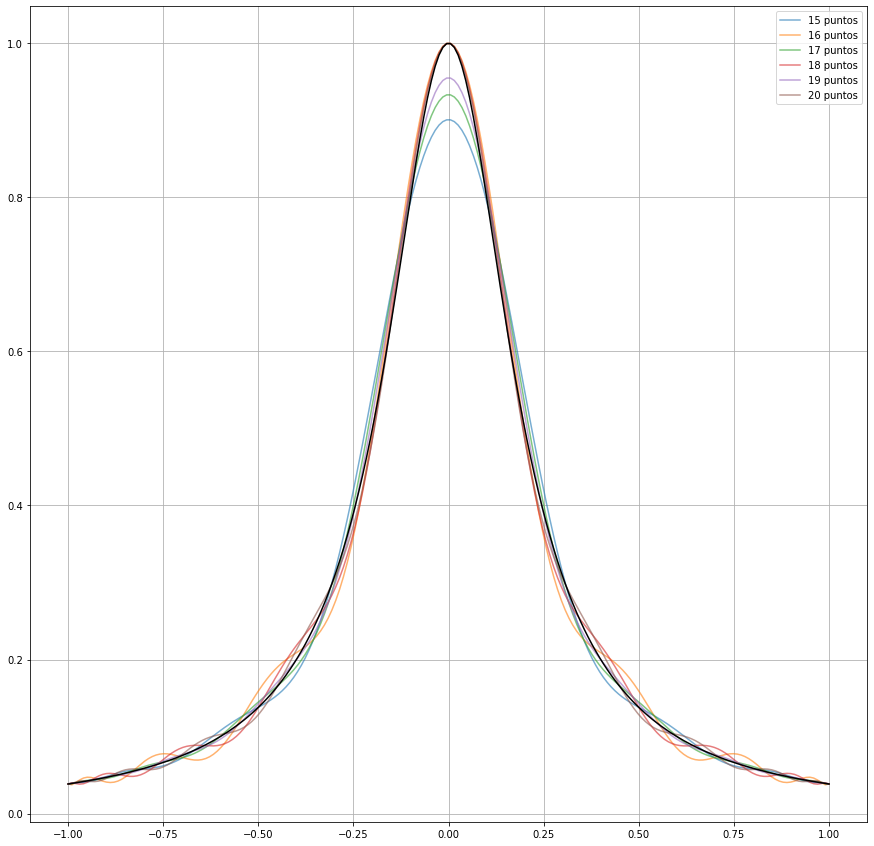

In [ ]:
import matplotlib.pyplot as plt
def runge(w):
    return(1/(1+25*w**2))


plt.figure(figsize=(15, 15))
for n in range(15, 21):
  punt=[np.cos(i*np.pi/n) for i in range(n+1)]
  punt=punt[::-1]

  X=np.array(punt)
  Y=runge(X)
  x=np.linspace(-1,1,200)
  y=ddiff1(X,Y,x)
  #plt.plot(X,Y,"ko")
  plt.plot(x,y, label=f'{n} puntos', alpha=0.6)

x=np.linspace(-1,1,200)
plt.plot(x,runge(x), 'k')
plt.legend()
plt.grid()
plt.show()


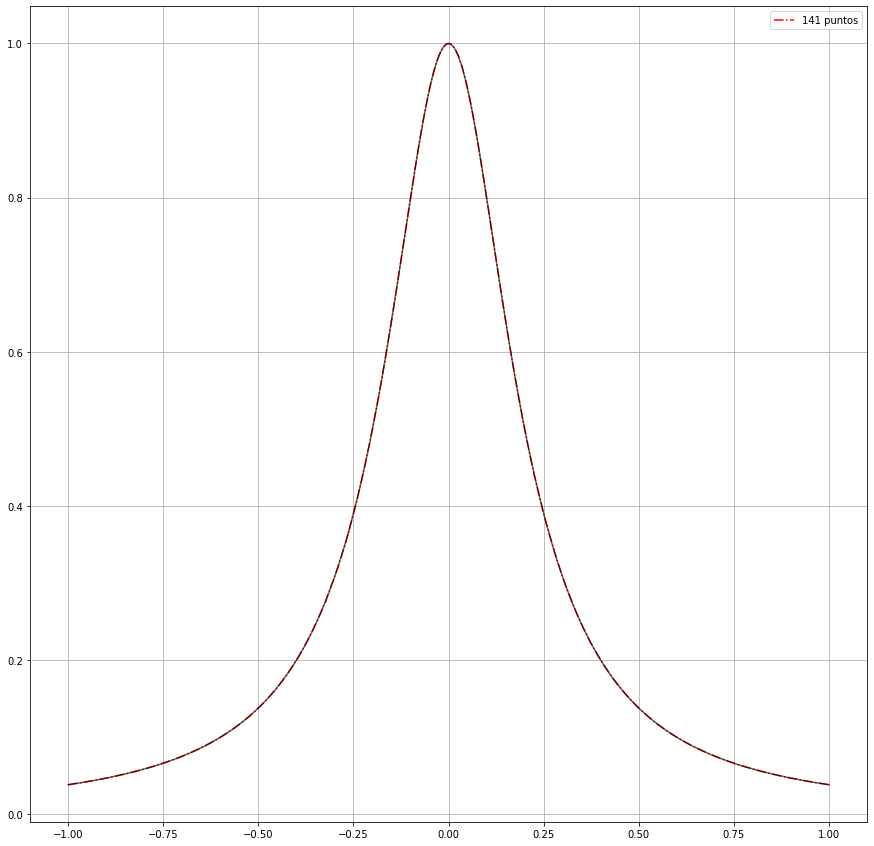

In [ ]:
n=141
plt.figure(figsize=(15, 15))
punt=[np.cos(i*np.pi/n) for i in range(n+1)]
punt=punt[::-1]

X=np.array(punt)
Y=runge(X)
x=np.linspace(-1,1,1000)
y=ddiff1(X,Y,x)
#plt.plot(X,Y,"ko")
plt.plot(x,y, 'r-.', label=f'{n} puntos', alpha=1)
x=np.linspace(-1,1,200)
plt.plot(x,runge(x), 'k', alpha=0.6)
plt.legend()
plt.grid()
plt.show()